In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

### 회귀(Regression)

#### 단순 선형 회귀에서 회귀계수 추정 방식
- 1. 미분 공식: 회귀계수에 대한 SSE(Sum of Square Error)를 미분 = 0 임을 통해 도출.
- 2. 학습 : input initial value(초기값)  ex) w=5 <br>
    w = w - a(러닝 메이트)*(w에 대한 미분)

#### 1. 미분공식을 통한 추정

#### 가설(hypothesis) 설정

$H_0$ : 영어점수와 수학점수는 연관성을 가지지 않는다. ( $\beta_1$ = 0 ) 
$\quad$  vs $\quad$  $H_1$ : 영어점수와 수학점수는 서로 연관성을 가진다. ( $not H_0$ )

In [5]:
df = pd.read_csv( 'data3/ch2_scores_em.csv', index_col='student number')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   english      50 non-null     int64
 1   mathematics  50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


#### 회귀분석 결과

In [58]:
res = st.linregress( df['english'], df['mathematics'] )
print( '기울기   =', res.slope )
print( '절편     =', res.intercept )
print( '상관계수 =', res.rvalue ) # df.corr()
print( 'p값      =', res.pvalue )      # 유의수준 0.05에서 귀무가설 기각.
print( '표준편차 =', res.stderr)

기울기   = 0.6214230159505968
절편     = 42.601324328804154
상관계수 = 0.7237414863069244
p값      = 2.8760870522821355e-09
표준편차 = 0.08552186247949062


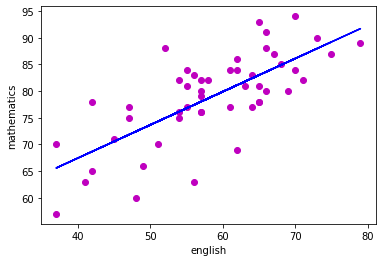

In [57]:
plt.xlabel('english'); plt.ylabel('mathematics')
plt.scatter( df['english'], df['mathematics'], c='m' )
lm = res.slope*df['english'] + res.intercept
plt.plot( df['english'], lm, 'b-')
plt.show()

#### 2. 학습 방식을 통한 추정

#### cost (MSE : Mean Square Error) 정의
$$cost(w) = \frac{1}{n}\sum_{i=1}^n (wx_{(i)}-y_{(i)})^2 $$ <br> $$ where \quad wx_{(i)} = true\,obs \; ,\, y_{(i)} = estimate\,of\, obs$$

In [7]:
def cost( x, y, w ):
    c=0
    for i in np.arange( len(x) ):
        hx = w*x[i]
        c  = c+( hx-y[i])**2
    return c/len(x)

In [ ]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

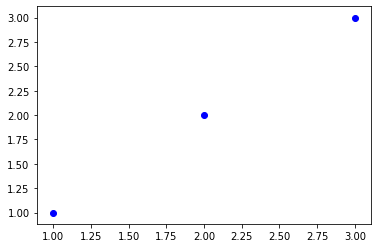

In [61]:
plt.scatter(x_data, y_data, c='b');plt.show()

#### For 최적의 가중치를 효과적으로 찾기 => MSE를  Convex Function으로 ~

In [13]:
print( cost(x_data, y_data, -1) )
print( cost(x_data, y_data, 0) )
print( cost(x_data, y_data, 1) )
print( cost(x_data, y_data, 2) )
print( cost(x_data, y_data, 3) )

18.666666666666668
4.666666666666667
0.0
4.666666666666667
18.666666666666668


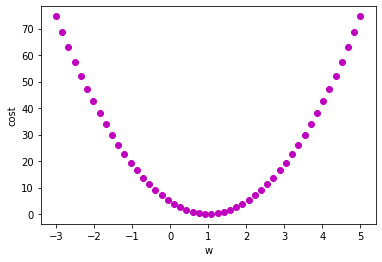

In [60]:
for w in np.linspace(-3, 5, 50):
    c = cost( x_data, y_data, w)
   # print(w, c)
    plt.plot( w, c, 'mo')
plt.xlabel('w')
plt.ylabel('cost')
plt.show()

#### 경사 하강법(Gradient descent)
- 경사 하강법(Gradient descent)은 1차 근삿값 발견용 최적화 알고리즘이다. 기본 개념은 함수의 기울기(경사)를 구하고 경사의 절댓값이 낮은 쪽으로 계속 이동시켜 극값에 이를 때까지 반복시킴.
- 경사하강법 : https://angeloyeo.github.io/2020/08/16/gradient_descent.html
- 경사하강법을 이용한 회귀분석 : https://angeloyeo.github.io/2020/08/24/linear_regression.html

$$cost(w) := \frac{1}{2n}\sum_{i=1}^n (wx_{(i)}-y_{(i)})^2 $$ <br>
\begin{align}
w_{(j+1)} := w_{(j)} - \alpha\frac{1}{n}\sum_{i=1}^n (w_{(j)}x_{(i)}-y_{(i)})x_{(i)}=  w_{(j)}- \alpha*cost^\prime(w_{(j)})
, \quad \alpha = LearningRate
\end{align}

In [29]:
def gradient_descent( x, y, w ):
    c = 0
    for i in range( len(x) ):
        hx = w*x[i]
        c = c + (hx-y[i])*x[i] # 편미분
    return c / len(x)

In [35]:
def show_gradient( x, y, w ):
    for i in range(200):
        c = cost( x, y, w )
        g = gradient_descent( x, y, w)
        w = w - 0.1*g
        print(i, c, w)
    print('w:', w)

In [36]:
show_gradient( x_data, y_data, 10 )

0 378.0 5.8
1 107.51999999999998 3.56
2 30.583466666666666 2.365333333333333
3 8.69929718518518 1.7281777777777778
4 2.47446675489712 1.3883614814814815
5 0.7038483213929583 1.2071261234567903
6 0.2002057447517751 1.1104672658436214
7 0.05694741184050483 1.0589158751165981
8 0.016198374923521403 1.0314218000621858
9 0.004607537756023892 1.0167582933664991
10 0.0013105885172690224 1.008937756462133
11 0.0003727896226898598 1.004766803446471
12 0.0001060379371206724 1.002542295171451
13 3.0161902114324568e-05 1.0013558907581073
14 8.579385490296031e-06 1.0007231417376572
15 2.4403585394623746e-06 1.000385675593417
16 6.941464290019953e-07 1.0002056936498225
17 1.9744609536079287e-07 1.0001097032799053
18 5.616244490256599e-08 1.0000585084159495
19 1.597509543893363e-08 1.0000312044885065
20 4.544027147100321e-09 1.0000166423938701
21 1.292523277397425e-09 1.0000088759433974
22 3.6765106557353845e-10 1.0000047338364786
23 1.0457630309680019e-10 1.0000025247127886
24 2.974614843652282e-11 